# **MBTI Personality Prediction**


---



In [1]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Machine Learning packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#loading dataset
#data_set = pd.read_csv("../input/mbti-type/mbti_1.csv")
#data_set = pd.read_csv('/content/drive/MyDrive/New-mbti-df.csv',index_col=[0])
data_set = pd.read_csv('/content/drive/MyDrive/Cleaned_MBTI.csv',index_col=[0])
data_set.tail()

,type,posts,E-I,N-S,F-T,J-P,Cleaned_posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,I,S,F,P,ixfp just because i always think of cats as fi...
8671,ENFP,'So...if this thread already exists someplace ...,E,N,F,P,soif this thread already exists someplace else...
8672,INTP,'So many questions when i do these things. I ...,I,N,T,P,so many questions when i do these things i wou...
8673,INFP,'I am very conflicted right now when it comes ...,I,N,F,P,i am very conflicted right now when it comes t...
8674,INFP,'It has been too long since I have been on per...,I,N,F,P,it has been too long since i have been on pers...


In [6]:
data_set=data_set[['Cleaned_posts','type']]

# Exploratory data analysis

Checking if there are any missing or null values present in the dataset.

In [7]:
data_set.isnull().any()

Cleaned_posts     True
type             False
dtype: bool

In [8]:
data_set.shape

(8675, 2)

In [9]:
data_set.describe(include=['object'])

,Cleaned_posts,type
count,8662,8675
unique,8637,16
top,h,INFP
freq,11,1832


## Splitting into X and Y feature

In [10]:
# Vectorizing the posts for the model and filtering Stop-words
vect = CountVectorizer(stop_words='english') 

# Converting posts (or training or X feature) into numerical form by count vectorization
train =  vect.fit_transform(data_set["Cleaned_posts"].astype('U'))

In [11]:
train.shape

(8675, 111303)

In [12]:
enc = LabelEncoder()
data_set['label'] = enc.fit_transform(data_set['type'])

target = data_set['label'] 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, stratify=target, random_state=42)
print((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(6072, 111303) (6072,) (2603, 111303) (2603,)


**Note:** Algorithms below can be quite time consuming

In [14]:
def Performance_Metrics(y_test,y_pred):
    print('-------------------PERFORMANCE METRICS-------------------')
    print("Accuracy:",100*accuracy_score(y_test, y_pred))
    print('F1 score:', 100*f1_score(y_test, y_pred,average='weighted'))
    print('Recall:', 100*recall_score(y_test, y_pred,average='weighted'))
    print('Precision:', 100*precision_score(y_test, y_pred, average='weighted'))
    print('---------------------------------------------------------')

In [15]:
accuracies = {}

In [18]:
def model_building(model,X_train, y_train,X_test,y_test,model_name):
  #Fit the Model
  model.fit(X_train, y_train)
  #Make predictions for test data
  Y_pred = model.predict(X_test)
  predictions = [round(value) for value in Y_pred]
  #Evaluate predictions
  accuracy = accuracy_score(y_test, predictions)
  accuracies[model_name] = accuracy* 100.0 
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  Performance_Metrics(y_test,Y_pred)

In [21]:
#Random Forest
random_forest=RandomForestClassifier(n_estimators=100)
model_building(random_forest,X_train, y_train,X_test,y_test,'Random Forest')

Accuracy: 31.16%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 31.156358048405686
F1 score: 23.86520461379241
Recall: 31.156358048405686
Precision: 29.9043462843246
---------------------------------------------------------


In [22]:
#XG Boost 
xgb = XGBClassifier()
model_building(xgb,X_train, y_train,X_test,y_test,'XG Boost ')

Accuracy: 46.75%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 46.75374567806377
F1 score: 44.83446792506371
Recall: 46.75374567806377
Precision: 49.11164517959186
---------------------------------------------------------


In [23]:
#Gradient Descent
sgd = SGDClassifier(max_iter= 20, tol=None)
model_building(sgd,X_train, y_train,X_test,y_test,'Gradient Descent')

Accuracy: 39.68%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 39.684978870533996
F1 score: 39.34051428510834
Recall: 39.684978870533996
Precision: 39.73809551335252
---------------------------------------------------------


In [24]:
# Logistic Regression
logreg = LogisticRegression()
model_building(logreg,X_train, y_train,X_test,y_test,'Logistic Regression')

Accuracy: 41.30%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 41.29850172877449
F1 score: 39.592840697999996
Recall: 41.29850172877449
Precision: 40.163863375685914
---------------------------------------------------------


In [25]:
pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracies(%)'])

,Accuracies(%)
Random Forest,31.156358
XG Boost,46.753746
Gradient Descent,39.684979
Logistic Regression,41.298502


# Train Each Personality Dimension Seperately


In [27]:
data = pd.read_csv('/content/drive/MyDrive/New-mbti-df.csv',index_col=[0])
data

,Cleaned_posts,type
0,know tool use interaction people excuse antiso...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w strong wing understand p...,INFP
106065,since january busy schedule able spend little ...,INFP


In [28]:
#Add Attributes For personality type indicators
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found') 
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'I/E':I, 'N/S':N , 'T/F': T, 'J/P': J }) 

data = data.join(data.apply (lambda row: get_types (row),axis=1))
data.head(5)

,Cleaned_posts,type,I/E,N/S,T/F,J/P
0,know tool use interaction people excuse antiso...,INTJ,1,1,1,1
1,rap music ehh opp yeah know valid well know fa...,INTJ,1,1,1,1
2,preferably p hd low except wew lad video p min...,INTJ,1,1,1,1
3,drink like wish could drink red wine give head...,INTJ,1,1,1,1
4,space program ah bad deal meing freelance max ...,INTJ,1,1,1,1


In [29]:
data = data.sample(frac=1)
data.head()

,Cleaned_posts,type,I/E,N/S,T/F,J/P
58897,fail determine whether masterfully medium use ...,ENFP,0,1,0,0
87358,move away upset say something year late start ...,INFJ,1,1,0,1
34332,participation keep point save small talk perso...,INTP,1,1,1,0
105660,friendly compassionate wallflower homebody sil...,INFP,1,1,0,0
16444,best guess holmes p house probably holmes perh...,INTJ,1,1,1,1


In [31]:
#No. of posts in one class / Total no. of posts in the other class
print ("Introversion (I):", data['I/E'].value_counts()[0],"Extroversion (E):",data['I/E'].value_counts()[1])
print ("Intuition (N):", data['N/S'].value_counts()[0],  "Sensing (S):", data['N/S'].value_counts()[1])
print ("Thinking (T):", data['T/F'].value_counts()[0], "Feeling (F):" , data['T/F'].value_counts()[1])
print ("Judging (J):", data['J/P'].value_counts()[0], "Perceiving (P):", data['J/P'].value_counts()[1])

Introversion (I): 25390 Extroversion (E): 80677
Intuition (N): 9201 Sensing (S): 96866
Thinking (T): 36864 Feeling (F): 69203
Judging (J): 61632 Perceiving (P): 44435


In [32]:
#Plotting the distribution of each personality type indicator
N = 4
bottom = (data['I/E'].value_counts()[0], data['N/S'].value_counts()[0], data['T/F'].value_counts()[0], data['J/P'].value_counts()[0])
top = (data['I/E'].value_counts()[1], data['N/S'].value_counts()[1], data['T/F'].value_counts()[1], data['J/P'].value_counts()[1])

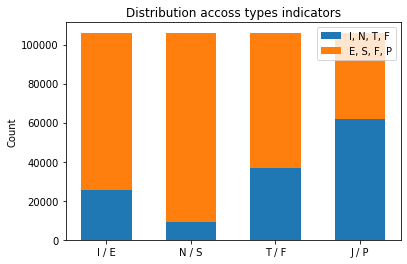

In [33]:

ind = np.arange(N)  
width = 0.6    

p1 = plt.bar(ind, bottom, width, label="I, N, T, F")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, F, P") 

plt.title('Distribution accoss types indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'T / F', 'J / P',))
plt.legend()

plt.show()

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [39]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [35]:
lemmatiser = WordNetLemmatizer()

# Remove the stop words for speed 
useless_words = stopwords.words("english")

# Remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

Binarizing the each personality type feature

In [37]:
# Splitting the MBTI personality into 4 letters and binarizing it

b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    return [b_Pers[l] for l in personality]

#To show result output for personality prediction
def translate_back(personality):
    # transform binary vector to mbti personality
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.type])
print(list_personality_bin)

[[1 0 0 1]
 [0 0 0 0]
 [0 0 1 1]
 ...
 [0 0 1 1]
 [0 0 1 0]
 [0 0 1 1]]


In [40]:
def pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True):
  list_personality = []
  list_posts = []
  len_data = len(data)
  i=0
  
  for row in data.iterrows():
      #Remove and clean comments
      posts = row[1].Cleaned_posts

      #Remove url links 
      temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', str(posts))

      #Remove Non-words - keep only words
      temp = re.sub("[^a-zA-Z]", " ", temp)

      # Remove spaces > 1
      temp = re.sub(' +', ' ', temp).lower()

      #Remove multiple letter repeating words
      temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)

      #Remove stop words
      if remove_stop_words:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
      else:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
          
      #Remove MBTI personality words from posts
      if remove_mbti_profiles:
          for t in unique_type_list:
              temp = temp.replace(t,"")

      # transform mbti to binary vector
      type_labelized = translate_personality(row[1].type) #or use lab_encoder.transform([row[1].type])[0]
      list_personality.append(type_labelized)
      # the cleaned data temp is passed here
      list_posts.append(temp)

  # returns the result
  list_posts = np.array(list_posts)
  list_personality = np.array(list_personality)
  return list_posts, list_personality

In [41]:

list_posts, list_personality  = pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True)


In [43]:
print("\nPost before preprocessing:\n\n", data.Cleaned_posts[0])
print("\nPost after preprocessing:\n\n", list_posts[0])



Post before preprocessing:

 know tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad u stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like u specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score


**Tf–idf** 

In [44]:
# Vectorizing the database posts to a matrix of token counts for the model
cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000,  
                             max_df=0.7,
                             min_df=0.1) 

# the feature should be made of word n-gram 
# Learn the vocabulary dictionary and return term-document matrix
print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(list_posts)

#The enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
feature_names = list(enumerate(cntizer.get_feature_names()))
print("10 feature names can be seen below")
print(feature_names[0:10])

# For the Standardization or Feature Scaling Stage :-
# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
print("\nUsing Tf-idf :")

print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)

Using CountVectorizer :
10 feature names can be seen below
[(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'accept'), (4, 'accurate'), (5, 'across'), (6, 'act'), (7, 'action'), (8, 'actual'), (9, 'actually')]

Using Tf-idf :
Now the dataset size is as below
(106067, 593)


In [45]:
#counting top 10 words
reverse_dic = {}
for key in cntizer.vocabulary_:
    reverse_dic[cntizer.vocabulary_[key]] = key
top_10 = np.asarray(np.argsort(np.sum(X_cnt, axis=0))[0,-10:][0, ::-1]).flatten()
[reverse_dic[v] for v in top_10] #top_50

['type',
 'need',
 'friend',
 'lot',
 'use',
 'life',
 'someone',
 'love',
 'mean',
 'come']

X: User Posts in TF-IDF representation

Y: Personality type in Binarized MBTI form

In [46]:
personality_type = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) / Sensing (S)", 
                   "FT: Feeling (F) / Thinking (T)", "JP: Judging (J) / Perceiving (P)"  ]

for l in range(len(personality_type)):
    print(personality_type[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) / Sensing (S)
FT: Feeling (F) / Thinking (T)
JP: Judging (J) / Perceiving (P)


TF-IDF representation

In [47]:
print("X: 1st posts in tf-idf representation\n%s" % X_tfidf[5])

X: 1st posts in tf-idf representation
[0.06334303 0.         0.         0.23376403 0.         0.
 0.         0.23697612 0.         0.06489815 0.         0.
 0.         0.         0.04413338 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.07025658 0.         0.         0.         0.         0.
 0.04575255 0.03575253 0.05734348 0.         0.         0.
 0.06801717 0.         0.         0.         0.         0.
 0.11589968 0.         0.         0.06455338 0.         0.
 0.         0.03606926 0.04765916 0.         0.         0.
 0.12742517 0.         0.         0.04284409 0.07302311 0.
 0.         0.         0.05153893 0.         0.         0.
 0.         0.         0.         0.         0.08936234 0.04024648
 0.         0.         0.         0.10397022 0.06759754 0.
 0.04118257 0.         0.         0.06060778 0.         0.
 0.         0.         0.07031823 0.04511933 0.         0.
 0.         0.         0.         0.05805951 0.         0.
 0.       

## Training & Evaluating Models

In [48]:
# Posts in tf-idf representation
X = X_tfidf

In [53]:
def model_individual(personality_type,list_personality,X,model):
  # Individually training each mbti personlity type
  for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))
    Performance_Metrics(y_test,y_pred)

In [54]:
#Random Forest 
model_rf=RandomForestClassifier()
model_individual(personality_type,list_personality,X,model_rf)

IE: Introversion (I) / Extroversion (E) Accuracy: 76.52%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 76.5249363627793
F1 score: 67.16172021315276
Recall: 76.5249363627793
Precision: 73.8430836010745
---------------------------------------------------------
NS: Intuition (N) / Sensing (S) Accuracy: 91.16%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 91.15992583514031
F1 score: 86.9596996035299
Recall: 91.15992583514031
Precision: 88.40884990884823
---------------------------------------------------------
FT: Feeling (F) / Thinking (T) Accuracy: 74.82%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 74.82165865309072
F1 score: 71.76566769684548
Recall: 74.82165865309072
Precision: 75.72354321659083
---------------------------------------------------------
JP: Judging (J) / Perceiving (P) Accuracy: 65.68%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 65.67989692341536
F1 score: 62.95126716169032
Recal

In [55]:
#XGB Classifier
model_xgb = XGBClassifier()
model_individual(personality_type,list_personality,X,model_xgb)

IE: Introversion (I) / Extroversion (E) Accuracy: 77.78%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 77.77568272524434
F1 score: 71.32350436780108
Recall: 77.77568272524434
Precision: 75.71682303557891
---------------------------------------------------------
NS: Intuition (N) / Sensing (S) Accuracy: 91.51%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 91.51189466075861
F1 score: 87.93378971151962
Recall: 91.51189466075861
Precision: 90.83669414942263
---------------------------------------------------------
FT: Feeling (F) / Thinking (T) Accuracy: 76.73%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 76.72920398478992
F1 score: 74.83690176276457
Recall: 76.72920398478992
Precision: 76.88561129287685
---------------------------------------------------------
JP: Judging (J) / Perceiving (P) Accuracy: 67.72%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 67.7194305647214
F1 score: 66.09910326455196
Re

In [56]:
# Stocastic Gradient Descent 
model_sgd = SGDClassifier()
model_individual(personality_type,list_personality,X,model_sgd)

IE: Introversion (I) / Extroversion (E) Accuracy: 76.40%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 76.40237578957291
F1 score: 66.42247195284972
Recall: 76.40237578957291
Precision: 76.89187899016505
---------------------------------------------------------
NS: Intuition (N) / Sensing (S) Accuracy: 91.16%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 91.15678325634016
F1 score: 86.93972551840136
Recall: 91.15678325634016
Precision: 83.09559133643377
---------------------------------------------------------
FT: Feeling (F) / Thinking (T) Accuracy: 81.21%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 81.20737877502279
F1 score: 80.6295176664072
Recall: 81.20737877502279
Precision: 80.93994575260074
---------------------------------------------------------
JP: Judging (J) / Perceiving (P) Accuracy: 69.16%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 69.16187423399641
F1 score: 68.85128227873307
Re

In [57]:
model_lr = LogisticRegression() 
model_individual(personality_type,list_personality,X,model_lr)

IE: Introversion (I) / Extroversion (E) Accuracy: 78.68%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 78.67760284089124
F1 score: 75.42290967248486
Recall: 78.67760284089124
Precision: 76.13792088105517
---------------------------------------------------------
NS: Intuition (N) / Sensing (S) Accuracy: 91.79%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 91.79472675277333
F1 score: 89.26381576855911
Recall: 91.79472675277333
Precision: 90.04489525579761
---------------------------------------------------------
FT: Feeling (F) / Thinking (T) Accuracy: 81.33%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 81.33308192702931
F1 score: 81.00044371833312
Recall: 81.33308192702931
Precision: 81.01299669278913
---------------------------------------------------------
JP: Judging (J) / Perceiving (P) Accuracy: 69.10%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 69.10216523679331
F1 score: 68.57328345357534
R

In [58]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_individual(personality_type,list_personality,X,model_nb)

IE: Introversion (I) / Extroversion (E) Accuracy: 69.43%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 69.43213601081048
F1 score: 71.0354917447788
Recall: 69.43213601081048
Precision: 73.96707332963908
---------------------------------------------------------
NS: Intuition (N) / Sensing (S) Accuracy: 75.77%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 75.76757487193991
F1 score: 80.502542713432
Recall: 75.76757487193991
Precision: 88.79686975718019
---------------------------------------------------------
FT: Feeling (F) / Thinking (T) Accuracy: 73.85%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 73.8537443826404
F1 score: 74.37344731472963
Recall: 73.8537443826404
Precision: 75.87609980713104
---------------------------------------------------------
JP: Judging (J) / Perceiving (P) Accuracy: 63.34%
-------------------PERFORMANCE METRICS-------------------
Accuracy: 63.335533138493446
F1 score: 63.56192520562451
Recal

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
#estimator=[int(x) for x in np.linspace(start=2, stop = 200,num=198)]   
n_estimator= [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [None,2,4,6,8,10]
min_samples_split = [2,3,5,6,7,9,10]
min_samples_leaf = [1,2,3,4,5]
bootstrap = [True, False]
random_forest_tuning = {'n_estimators': n_estimator,
                        'max_features': max_features,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'bootstrap': bootstrap}

In [73]:
def RF_Hyperparameter_Tuning(model_tuning, X_train, y_train,X_test, y_test,model_tuning_list):
    _random = RandomizedSearchCV(estimator = model_tuning, param_distributions = model_tuning_list, n_iter = 10, cv = 2, verbose=2, random_state=0, n_jobs = -1)
    _random.fit(X_train, y_train)
    print('Best Params: ',_random.best_params_)
    print('Best Score: ',_random.best_score_*100)
    print('Best Estimator: ',_random.best_estimator_)
    y_prediction = _random.best_estimator_.predict(X_test)
    Performance_Metrics(y_test,y_prediction)

In [74]:
def model_individual(personality_type,list_personality,X,model,model_tuning_list):
  # Individually training each mbti personlity type
  for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    
    RF_Hyperparameter_Tuning(model, X_train, y_train,X_test, y_test,model_tuning_list)

In [75]:
model_rf=RandomForestClassifier()

In [76]:
model_individual(personality_type,list_personality,X,model_rf,random_forest_tuning )

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Params:  {'n_estimators': 73, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
Best Score:  76.31926299059882
Best Estimator:  RandomForestClassifier(bootstrap=False, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=73)
-------------------PERFORMANCE METRICS-------------------
Accuracy: 76.68206530278748
F1 score: 67.5202509488365
Recall: 76.68206530278748
Precision: 75.16359176905024
---------------------------------------------------------
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Params:  {'n_estimators': 52, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 6, 'bootstrap': True}
Best Score:  91.39751636451795
Best Estimator:  RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=5,
                       n_estimators=52)
-------------------PERFORMANCE M

In [ ]:
from sklearn.metrics import plot_confusion_matrix

#fig, ax = plt.subplots(1, 1,figsize=(15,10)) 
#plot_confusion_matrix(LG, X_test, y_test,ax=ax)

In [ ]:
xgboost_params = {'max_depth': [1,2,3,4,5,6,7,8,9,10],
          'min_child_weight': [1,2,3,5,7,9,10],
          'gamma': [0,0.2,0.3,0.5, 1, 1.5, 2,2.5,5],
          'subsample': [0.5,0.6,0.7,0.8,0.9,1.0],
          'colsample_bytree': [0.1,0.2,0.4,0.6,0.8,1.0]
        }
model_xgb=XGBClassifier()
model_individual(personality_type,list_personality,X,model_xgb,xgboost_params)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Params:  {'subsample': 0.9, 'min_child_weight': 9, 'max_depth': 8, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best Score:  78.23721143226572
Best Estimator:  XGBClassifier(colsample_bytree=1.0, gamma=0.2, max_depth=8, min_child_weight=9,
              subsample=0.9)
-------------------PERFORMANCE METRICS-------------------
Accuracy: 78.6367493164891
F1 score: 74.31136397148667
Recall: 78.6367493164891
Precision: 76.29011267349819
---------------------------------------------------------
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Params:  {'subsample': 0.9, 'min_child_weight': 10, 'max_depth': 10, 'gamma': 2.5, 'colsample_bytree': 1.0}
Best Score:  91.88239097055734
Best Estimator:  XGBClassifier(colsample_bytree=1.0, gamma=2.5, max_depth=10,
              min_child_weight=10, subsample=0.9)
-------------------PERFORMANCE METRICS-------------------
Accuracy: 91.81986738317464
F1 score: 88.86112653191478